In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
bikes = pd.read_csv('../cleaned_data/bike_detail.csv')
fences = pd.read_csv('../cleaned_data/fence_position.csv')

In [4]:
bikes.sample(5)

,Unnamed: 0,BICYCLE_ID,LATITUDE,LONGITUDE,LOCK_STATUS,UPDATE_TIME,GRID,BID,NEAREST_FENCE,DISTANCE
222865,222865,390b9e79c6ccb89d8d80010195c66c2f,24.489370,118.169477,1,2020/12/25 8:21:59,wsk5340,222865,12203,0.000000
86255,86255,0f06e6c458f3ab781f5990329455bdd6,24.454473,118.071165,1,2020/12/21 7:42:12,ws7gngb,86255,13792,5.114458
106239,106239,6469121743db18e8c350a4f256ba2ee2,24.491727,118.121015,0,2020/12/22 8:13:23,ws7grft,106239,8894,37.175576
53787,53787,61f2eb9d90a6aa01ef8c6df84328065e,24.453361,118.078400,0,2020/12/21 7:36:24,ws7gngw,53787,12918,28.390089
225164,225164,53c0e5f4e71f59980b8c96b8ed0f7995,24.497420,118.128614,0,2020/12/25 7:32:32,wsk525d,225164,7663,44.563636


In [5]:
fences.sample(5)

,FENCE_ID,LONGITUDE_0,LATITUDE_0,LONGITUDE_1,LATITUDE_1,LONGITUDE_2,LATITUDE_2,LONGITUDE_3,LATITUDE_3,LONGITUDE_4,LATITUDE_4,LATITUDE,LONGITUDE,ROAD,AREA,FID
1655,会展南三路_R_3,118.177242,24.464628,118.177203,24.464573,118.177189,24.464582,118.177227,24.464636,118.177242,24.464628,24.464605,118.177215,会展南三路,6.578132,1655
12992,长兴路_R_2,118.092934,24.523924,118.092937,24.523849,118.092921,24.523848,118.092918,24.523924,118.092934,24.523924,24.523886,118.092927,长兴路,6.989963,12992
9999,石亭路0_R_4,118.086573,24.483933,118.086555,24.483928,118.086536,24.483977,118.086554,24.483982,118.086573,24.483933,24.483955,118.086555,石亭路,5.717886,9999
6563,机场北路_R_6,118.116746,24.549035,118.116660,24.549034,118.116660,24.549049,118.116746,24.549050,118.116746,24.549035,24.549042,118.116703,机场北路,7.729719,6563
4647,嘉禾路(莲前西路至吕岭路段)_R_5,118.116673,24.482657,118.116661,24.482606,118.116642,24.482609,118.116654,24.482661,118.116673,24.482657,24.482633,118.116658,嘉禾路莲前西路至吕岭路段,6.029995,4647


In [ ]:
if 'Unnamed: 0' in bikes.columns:
    bikes.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
def extract_hms(update_time):
    update_time = update_time.split(' ')
    return update_time[-1]

In [7]:
max_time = max([extract_hms(time) for time in bikes['UPDATE_TIME']])
min_time = min([extract_hms(time) for time in bikes['UPDATE_TIME']])
print("一天中最早获得的自行车数据在" + min_time)
print("一天中最晚获得的自行车数据在" + max_time)

一天中最早获得的自行车数据在6:00:00
一天中最晚获得的自行车数据在9:59:59


<Figure size 1080x1080 with 0 Axes>

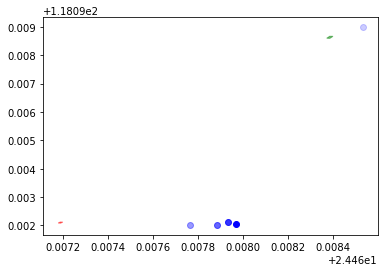

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
# f_3469 = [(24.4683856181,118.0986675689), (24.4683720711, 118.0985979694), (24.4683862086, 118.0985946846), (24.4683997556, 118.0986642841), (24.4683856181,118.0986675689)]
f_3617 = [(24.4671912052, 118.0920826039), (24.4672007626, 118.092119286), (24.467189823, 118.0921226884), (24.4671802656, 118.0920860063), (24.4671912052, 118.0920826039)]
tracks_x = [24.468531, 24.467766, 24.467886, 24.467932, 24.467969]
tracks_y = [118.098985, 118.092034, 118.09202, 118.092116, 118.09205]
fig = plt.figure()
ax = fig.add_subplot(111)
lines1 = plt.Polygon(f_3469, color = 'g', alpha = 0.5)
lines2 = plt.Polygon(f_3617, color = 'r', alpha = 0.5)
# other_points = plt.scatter(x = tracks_x, y = tracks_y, alpha = 0.2, color = 'blue')
for i in range(len(tracks_x)):
    plt.scatter(x = tracks_x[i], y = tracks_y[i], alpha = 0.2 * i + 0.2, color = 'blue')
plt.gca().add_line(lines1)
plt.gca().add_line(lines2)